# Lab 5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()
print("Shapes: {} {} {} {}".format(X_train.shape, y_train.shape, X_pred.shape, y_pred.shape))

Shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
X_train = X_train.reshape(len(X_train), -1)
X_pred = X_pred.reshape(len(X_pred), -1)

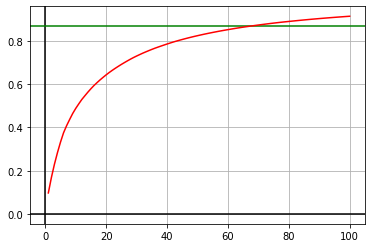

In [4]:
from sklearn.decomposition import PCA

M = 0

results = []
threshold = 0.87

temp_pca_solver = PCA(n_components=100, svd_solver='full')
temp_pca_solver.fit(X_train)

explained_variance = np.cumsum(temp_pca_solver.explained_variance_ratio_)

for m in range(100):
    results.append((m+1, explained_variance[m]))
    if (M == 0 and explained_variance[m] > threshold):
        M = m+1

clear_output(True)
plt.grid(True)
plt.axvline(0, color="black")
plt.axhline(0, color="black")
plt.axhline(threshold, color="green")
plt.plot(np.array(results)[:,0], np.array(results)[:,1], color="red")
plt.show()

del(temp_pca_solver)


In [5]:
print("Number of components M: {}".format(M))

pca_solver = PCA(n_components=M, svd_solver='full')
pca_solver.fit(X_train)

Number of components M: 68


PCA(n_components=68, svd_solver='full')

In [6]:
from sklearn.model_selection import train_test_split

#use your data

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=68)
X_train, X_test = (pca_solver.transform(X_train), pca_solver.transform(X_test))

# print("Picked mean value of 0th column of X_train: {}".format(np.mean(X_train[:,0])))

In [7]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree_solver = RandomForestClassifier(
    criterion = "gini", 
    min_samples_leaf=10,
    max_depth=20,
    n_estimators=10,
    random_state=68
)
forest_o_v_r_solver = OneVsRestClassifier(tree_solver)

forest_o_v_r_solver.fit(X_train, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=20,
                                                     min_samples_leaf=10,
                                                     n_estimators=10,
                                                     random_state=68))

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

c = 17 % 9

y_pred = forest_o_v_r_solver.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print("Predicted {}s for {}s: {}".format(
    c, c, cm[c][c])
)

print("Proba of getting {}s for any: {}".format(
    c, np.sum(cm[c]) / np.sum(cm))
)

print("Accuracy: {}\t Precision: {}\t Recall: {}\t F1 Score:{}".format(
    np.round(accuracy_score(y_test == c, y_pred == c), 3),
    np.round(precision_score(y_test == c, y_pred == c), 5),
    np.round(recall_score(y_test == c, y_pred == c), 5),
    np.round(f1_score(y_test == c, y_pred == c), 5)
))

Predicted 8s for 8s: 1531
Proba of getting 8s for any: 0.10061111111111111
Accuracy: 0.975	 Precision: 0.90059	 Recall: 0.84539	 F1 Score:0.87212


In [10]:
print("Overall:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print("  \t{}\n".format("\t".join([str(i)+":" for i in range(len(cm))])))
for i, row in enumerate(cm):
    print("{}:\t{}".format(i, "\t".join([str(x) for x in row])))

Overall:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1754
           1       0.96      0.98      0.97      2060
           2       0.91      0.92      0.91      1778
           3       0.90      0.89      0.89      1777
           4       0.91      0.91      0.91      1738
           5       0.87      0.87      0.87      1593
           6       0.92      0.96      0.94      1770
           7       0.93      0.93      0.93      1878
           8       0.90      0.85      0.87      1811
           9       0.90      0.89      0.90      1841

    accuracy                           0.92     18000
   macro avg       0.91      0.92      0.91     18000
weighted avg       0.92      0.92      0.92     18000

Confusion Matrix:
  	0:	1:	2:	3:	4:	5:	6:	7:	8:	9:

0:	1696	0	8	3	1	8	27	2	8	1
1:	0	2010	16	4	0	10	5	7	7	1
2:	17	4	1629	21	15	8	17	20	44	3
3:	9	5	36	1578	5	54	14	13	49	14
4:	5	11	13	1	1578	5	26	8	14	77
5:	22	1	17	60	19	1389	35	9	25	

## BONUS

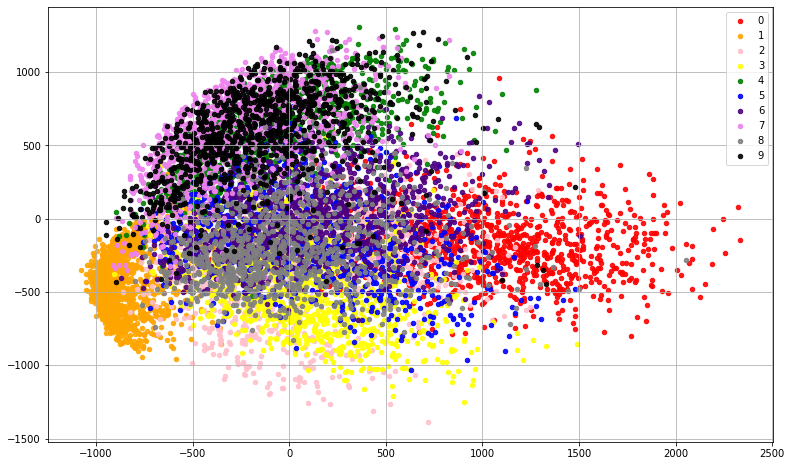

In [56]:
two_dim_pca_solver = PCA(n_components=2)
two_dim_pca_solver.fit(X_train)

two_dim_X = two_dim_pca_solver.transform(X_train)

step = 4

# plt.figure(figsize=(13, 8))
# plt.grid(True)
# plt.scatter(two_dim_X[:,0][::step], two_dim_X[:,1][::step], c=y_train[::step], s = 200, alpha=0.7)
# plt.legend(y_train)
# plt.show()
fig, ax = plt.subplots(figsize=(13, 8))
for (num, color) in enumerate(["red", "orange", "pink", "yellow", "green", "blue", "indigo", "violet", "grey", "black"]):
    ax.scatter(
        two_dim_X[:,0][y_train == num][::step],
        two_dim_X[:,1][y_train == num][::step],
        c = color,
        label = str(num),
        alpha=0.9,
        s = 20
    )
ax.legend()
ax.grid(True)
plt.show()